In [62]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [18]:
#Loading Image Data:
import os
import cv2
import matplotlib.pyplot as plt

width = 64
height = 64
channels = 3
num_classes = 7

metadata = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
class_dict = {'bkl':0, 'nv': 1,'df':2, 'mel':3, 'vasc':4, 'bcc':5, 'akiec':6 }

data_64x64_flatten = []
output_labels = []

# ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

# img_dir = '/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/'
# filename = 'ISIC_0028933.jpg'
# img_path = os.path.join(img_dir, filename)
# img = cv2.imread(img_path, 1)
# img_64x64 = cv2.resize(img, (64,64))
# img_flatten = img_64x64.reshape(1, 64*64*3)
# data_64x64_flatten.append(pd.DataFrame(img_flatten, dtype='uint8'))
# # print(type(data_64x64_flatten))
# x = pd.concat(data_64x64_flatten, axis = 0)
# print(x)

for dirname, _, filenames in os.walk('/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/'):
    for filename in filenames:
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path, 1)
        img_64x64 = cv2.resize(img, (width,height))
        img_flatten = img_64x64.reshape(1, width*height*channels)
        data_64x64_flatten.append(pd.DataFrame(img_flatten, dtype='uint8'))
        img_id = filename.replace('.jpg', '')
        output_labels.append(class_dict[metadata[metadata['image_id'] == img_id]['dx'].iloc[0]])

for dirname, _, filenames in os.walk('/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/'):
    for filename in filenames:
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path, 1)
        img_64x64 = cv2.resize(img, (width,height))
        img_flatten = img_64x64.reshape(1, width*height*channels)
        data_64x64_flatten.append(pd.DataFrame(img_flatten, dtype='uint8'))
        img_id = filename.replace('.jpg', '')
        output_labels.append(class_dict[metadata[metadata['image_id'] == img_id]['dx'].iloc[0]])


# for dirname, _, filenames in os.walk('/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/'):
#     for filename in filenames:
#         img_path = os.path.join(dirname, filename)
#         img = cv2.imread(img_path, 1)
#         blur = cv2.GaussianBlur(img, (5,5), 0)
#         _, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#         img_64x64 = cv2.resize(th3,(64,64))
#         img_flatten = img_64x64.reshape(1, 64*64*3)
#         data_64x64_flatten.append(pd.DataFrame(img_flatten, dtype='uint8'))

# for dirname, _, filenames in os.walk('/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/'):
#     for filename in filenames:
#         img_path = os.path.join(dirname, filename)
#         img = cv2.imread(img_path, 1)
#         blur = cv2.GaussianBlur(img, (5,5), 0)
#         _, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#         img_64x64 = cv2.resize(th3,(64,64))
#         img_flatten = img_64x64.reshape(1, 64*64*3)
#         data_64x64_flatten.append(pd.DataFrame(img_flatten, dtype='uint8'))


In [19]:
# import numpy as np

print(len(data_64x64_flatten))
x = (pd.concat(data_64x64_flatten, axis=0))/255
print(x.shape)
# df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

10015
(10015, 12288)


In [20]:
#Showing target properlly formated
x.head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.607843,0.592157,0.850980,0.580392,0.572549,0.839216,0.600000,0.592157,0.850980,0.568627,...,0.800000,0.600000,0.568627,0.815686,0.549020,0.572549,0.800000,0.368627,0.400000,0.647059
0,0.584314,0.447059,0.815686,0.603922,0.458824,0.807843,0.564706,0.411765,0.796078,0.623529,...,0.819608,0.603922,0.541176,0.819608,0.588235,0.533333,0.803922,0.588235,0.552941,0.800000
0,0.537255,0.596078,0.866667,0.537255,0.568627,0.866667,0.580392,0.588235,0.894118,0.635294,...,0.870588,0.623529,0.639216,0.870588,0.615686,0.635294,0.858824,0.549020,0.576471,0.843137
0,0.584314,0.509804,0.592157,0.576471,0.494118,0.588235,0.564706,0.482353,0.580392,0.513725,...,0.470588,0.427451,0.341176,0.450980,0.360784,0.333333,0.439216,0.396078,0.364706,0.450980
0,0.600000,0.541176,0.666667,0.603922,0.541176,0.670588,0.541176,0.537255,0.670588,0.619608,...,0.650980,0.564706,0.505882,0.631373,0.556863,0.505882,0.635294,0.533333,0.498039,0.627451


In [21]:
#Splitting the data in train, val and test
y = np.asarray(output_labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

In [22]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [23]:
#Reshaping the X data to an array(required by Keras)
width = 64
height = 64
channels = 3

x_train = x_train.values.reshape(int(len(x_train)),width,height,channels)
x_val = x_val.values.reshape(int(len(x_val)),width,height,channels)
x_test = x_test.values.reshape(int(len(x_test)),width,height,channels)

In [24]:
from keras.utils import to_categorical

y_train_c = to_categorical(y_train, num_classes)
y_val_c = to_categorical(y_val, num_classes)

**VGG Based CNN**

In [39]:
#Creating the CNN based on VGGNet

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(width,height,channels)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, kernel_initializer='glorot_uniform', activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1024, kernel_initializer='glorot_uniform', activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(7, kernel_initializer='glorot_uniform', activation='softmax'))

In [40]:
#Setting up the same optimizer configuration
opt = SGD(learning_rate=0.01, momentum=0.9)

In [41]:
#Compiling and training the model

print(np.asarray(y_train))
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(x_train, np.asarray(y_train_c), batch_size=256, epochs=74, validation_data=(x_val,y_val_c), verbose=1)

[1 1 1 ... 1 0 1]
Epoch 1/74
24/24 [==============================] - 3s 105ms/step - loss: 1.3426 - accuracy: 0.6415 - val_loss: 1.1573 - val_accuracy: 0.6730
Epoch 2/74
24/24 [==============================] - 2s 80ms/step - loss: 1.1227 - accuracy: 0.6700 - val_loss: 1.0628 - val_accuracy: 0.6730
Epoch 3/74
24/24 [==============================] - 2s 79ms/step - loss: 1.0455 - accuracy: 0.6700 - val_loss: 1.0228 - val_accuracy: 0.6730
Epoch 4/74
24/24 [==============================] - 2s 78ms/step - loss: 1.0086 - accuracy: 0.6700 - val_loss: 0.9888 - val_accuracy: 0.6730
Epoch 5/74
24/24 [==============================] - 2s 79ms/step - loss: 0.9881 - accuracy: 0.6700 - val_loss: 0.9552 - val_accuracy: 0.6730
Epoch 6/74
24/24 [==============================] - 2s 84ms/step - loss: 0.9754 - accuracy: 0.6700 - val_loss: 0.9536 - val_accuracy: 0.6730
Epoch 7/74
24/24 [==============================] - 2s 84ms/step - loss: 0.9687 - accuracy: 0.6700 - val_loss: 0.9533 - val_accuracy: 0

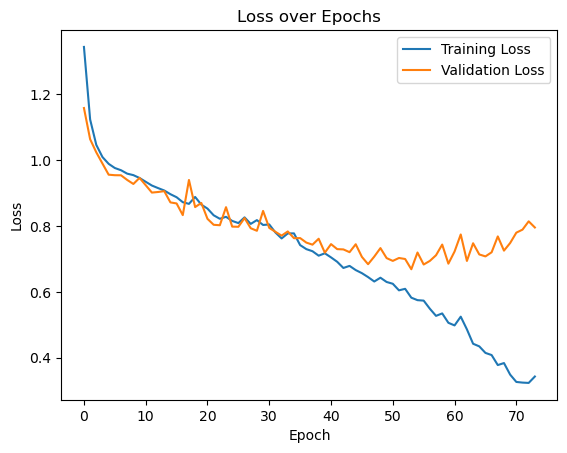

In [42]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.legend()
plt.show()

In [44]:
cnn_pred = cnn_model.predict(x_test)

63/63 [==============================] - 0s 4ms/step


In [49]:
cnn_final_pred = []

for prob in cnn_pred:
    max = -1
    max_index = -1
    for index, value in enumerate(prob):
        if value > max :
            max_index = index
            max = value
    cnn_final_pred.append(max_index)

cnn_final_pred = np.asarray(cnn_final_pred)

In [50]:
accuracy_score(y_test, cnn_final_pred)

0.7583624563155267

In [67]:
print(classification_report(y_test, cnn_final_pred, output_dict = False))

              precision    recall  f1-score   support

           0       0.60      0.45      0.51       220
           1       0.84      0.93      0.88      1331
           2       0.50      0.04      0.08        23
           3       0.51      0.37      0.43       240
           4       0.75      0.64      0.69        28
           5       0.46      0.46      0.46        98
           6       0.42      0.40      0.41        63

    accuracy                           0.76      2003
   macro avg       0.58      0.47      0.49      2003
weighted avg       0.74      0.76      0.74      2003



**RESNET50**

In [51]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, vgg19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# Set up data generators for training and validation sets
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_generator = train_datagen.flow_from_directory(
#     directory='/kaggle/input/skin-cancer-mnist-ham10000/',
#     target_size=input_shape[:2],
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )
# val_generator = train_datagen.flow_from_directory(
#     directory='path/to/train/dataset',
#     target_size=input_shape[:2],
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )

In [68]:
# Define the input shape of the images
input_shape = (64, 64, 3)

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='/kaggle/input/resent50-package/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                      include_top=False, 
                      input_shape=input_shape)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a new classifier layer on top of the base model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with Adam optimizer and categorical crossentropy loss
# model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the data generators
model.fit(
    x_train,
    np.asarray(y_train_c),
    validation_data=(x_test,np.asarray(y_val_c)),
    epochs=74
)

# Save the trained model
# model.save('resnet50_skin_cancer.h5')

Epoch 1/74
188/188 [==============================] - 10s 31ms/step - loss: 1.1318 - accuracy: 0.6662 - val_loss: 1.2006 - val_accuracy: 0.6690
Epoch 2/74
188/188 [==============================] - 4s 24ms/step - loss: 1.0739 - accuracy: 0.6690 - val_loss: 1.2256 - val_accuracy: 0.6600
Epoch 3/74
188/188 [==============================] - 4s 23ms/step - loss: 1.0356 - accuracy: 0.6760 - val_loss: 1.2349 - val_accuracy: 0.6380
Epoch 4/74
188/188 [==============================] - 5s 24ms/step - loss: 1.0129 - accuracy: 0.6733 - val_loss: 1.2614 - val_accuracy: 0.6540
Epoch 5/74
188/188 [==============================] - 4s 22ms/step - loss: 1.0080 - accuracy: 0.6765 - val_loss: 1.2506 - val_accuracy: 0.6555
Epoch 6/74
188/188 [==============================] - 5s 24ms/step - loss: 0.9852 - accuracy: 0.6805 - val_loss: 1.2892 - val_accuracy: 0.6071
Epoch 7/74
188/188 [==============================] - 5s 25ms/step - loss: 0.9852 - accuracy: 0.6790 - val_loss: 1.2808 - val_accuracy: 0.639

In [33]:
pred = model.predict(x_test)

63/63 [==============================] - 2s 14ms/step


In [36]:
final_pred = []

for prob in pred:
    max = -1
    max_index = -1
    for index, value in enumerate(prob):
        if value > max :
            max_index = index
            max = value
    final_pred.append(max_index)

final_pred = np.asarray(final_pred)

In [38]:
accuracy_score(y_test, final_pred)

0.6959560659011482

In [ ]:
print(classification_report(y_test, final_pred, output_dict = False))

**VGG19**

In [57]:
# Define the input shape of the images
input_shape = (64, 64, 3)

# Load the pre-trained ResNet50 model
vgg_base_model = vgg19.VGG19(weights='/kaggle/input/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                      include_top=False, 
                      input_shape=input_shape)

# Freeze the layers in the base model
for layer in vgg_base_model.layers:
    layer.trainable = False

# Add a new classifier layer on top of the base model
x = Flatten()(vgg_base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
vgg_model = Model(inputs=vgg_base_model.input, outputs=x)

# Compile the model with Adam optimizer and categorical crossentropy loss
vgg_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the data generators
vgg_model.fit(
    x_train,
    np.asarray(y_train_c),
    validation_data=(x_test,np.asarray(y_val_c)),
    epochs=74
)

# Save the trained model
# model.save('resnet50_skin_cancer.h5')

Epoch 1/74
188/188 [==============================] - 5s 23ms/step - loss: 0.9377 - accuracy: 0.6875 - val_loss: 1.4665 - val_accuracy: 0.6076
Epoch 2/74
188/188 [==============================] - 3s 17ms/step - loss: 0.7915 - accuracy: 0.7176 - val_loss: 1.6861 - val_accuracy: 0.5831
Epoch 3/74
188/188 [==============================] - 4s 20ms/step - loss: 0.7381 - accuracy: 0.7312 - val_loss: 1.6987 - val_accuracy: 0.5162
Epoch 4/74
188/188 [==============================] - 3s 17ms/step - loss: 0.7052 - accuracy: 0.7459 - val_loss: 1.8391 - val_accuracy: 0.4638
Epoch 5/74
188/188 [==============================] - 4s 20ms/step - loss: 0.6794 - accuracy: 0.7480 - val_loss: 1.8043 - val_accuracy: 0.5102
Epoch 6/74
188/188 [==============================] - 4s 20ms/step - loss: 0.6592 - accuracy: 0.7577 - val_loss: 1.8743 - val_accuracy: 0.5487
Epoch 7/74
188/188 [==============================] - 3s 17ms/step - loss: 0.6374 - accuracy: 0.7649 - val_loss: 2.0465 - val_accuracy: 0.5362

In [58]:
vgg_pred = vgg_model.predict(x_test)

63/63 [==============================] - 1s 10ms/step


In [59]:
vgg_final_pred = []

for prob in vgg_pred:
    max = -1
    max_index = -1
    for index, value in enumerate(prob):
        if value > max :
            max_index = index
            max = value
    vgg_final_pred.append(max_index)

vgg_final_pred = np.asarray(vgg_final_pred)

In [60]:
accuracy_score(y_test, vgg_final_pred)

0.7393909136295557

In [66]:
print(classification_report(y_test, vgg_final_pred, output_dict = False))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46       220
           1       0.83      0.92      0.87      1331
           2       0.50      0.22      0.30        23
           3       0.51      0.31      0.39       240
           4       0.89      0.61      0.72        28
           5       0.48      0.49      0.48        98
           6       0.30      0.19      0.23        63

    accuracy                           0.74      2003
   macro avg       0.57      0.46      0.50      2003
weighted avg       0.72      0.74      0.72      2003



**ENSEMBLING**

In [81]:
vgg_m_pred = cnn_model.predict(x_test)

ensemble_final_pred = []

total_pred = cnn_pred + vgg_pred + vgg_m_pred

for prob in total_pred:
    max = -1
    max_index = -1
    for index, value in enumerate(prob):
        if value > max :
            max_index = index
            max = value
    ensemble_final_pred.append(max_index)

ensemble_final_pred = np.asarray(ensemble_final_pred)
print(accuracy_score(y_test, ensemble_final_pred))
print("\n\n")
print(classification_report(y_test, ensemble_final_pred, output_dict = False))

63/63 [==============================] - 0s 4ms/step
0.7678482276585122



              precision    recall  f1-score   support

           0       0.59      0.47      0.52       220
           1       0.84      0.95      0.89      1331
           2       1.00      0.09      0.16        23
           3       0.54      0.35      0.42       240
           4       0.84      0.57      0.68        28
           5       0.52      0.51      0.52        98
           6       0.42      0.32      0.36        63

    accuracy                           0.77      2003
   macro avg       0.68      0.46      0.51      2003
weighted avg       0.75      0.77      0.75      2003



**VGG with Training multiple Layers**

In [69]:
# Define the input shape of the images
input_shape = (64, 64, 3)

# Load the pre-trained ResNet50 model
vgg_m_base_model = vgg19.VGG19(weights='/kaggle/input/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                      include_top=False, 
                      input_shape=input_shape)

# Freeze the layers in the base model
for layer in vgg_m_base_model.layers:
    layer.trainable = True

# Add a new classifier layer on top of the base model
x = Flatten()(vgg_m_base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
vgg_m_model = Model(inputs=vgg_m_base_model.input, outputs=x)

# Compile the model with Adam optimizer and categorical crossentropy loss
vgg_m_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the data generators
vgg_m_model.fit(
    x_train,
    np.asarray(y_train_c),
    validation_data=(x_test,np.asarray(y_val_c)),
    epochs=74
)

# Save the trained model
# model.save('resnet50_skin_cancer.h5')

Epoch 1/74
188/188 [==============================] - 14s 43ms/step - loss: 1.1874 - accuracy: 0.6643 - val_loss: 1.1392 - val_accuracy: 0.6730
Epoch 2/74
188/188 [==============================] - 8s 42ms/step - loss: 1.1490 - accuracy: 0.6665 - val_loss: 1.1454 - val_accuracy: 0.6730
Epoch 3/74
188/188 [==============================] - 8s 42ms/step - loss: 1.1534 - accuracy: 0.6618 - val_loss: 1.1347 - val_accuracy: 0.6730
Epoch 4/74
188/188 [==============================] - 7s 39ms/step - loss: 1.1545 - accuracy: 0.6663 - val_loss: 1.1412 - val_accuracy: 0.6730
Epoch 5/74
188/188 [==============================] - 7s 39ms/step - loss: 1.1747 - accuracy: 0.6700 - val_loss: 1.1311 - val_accuracy: 0.6730
Epoch 6/74
188/188 [==============================] - 7s 39ms/step - loss: 1.1363 - accuracy: 0.6700 - val_loss: 1.1318 - val_accuracy: 0.6730
Epoch 7/74
188/188 [==============================] - 7s 39ms/step - loss: 1.1427 - accuracy: 0.6665 - val_loss: 1.2037 - val_accuracy: 0.673

In [72]:
vgg_m_pred = cnn_model.predict(x_test)

vgg_m_final_pred = []

for prob in vgg_m_pred:
    max = -1
    max_index = -1
    for index, value in enumerate(prob):
        if value > max :
            max_index = index
            max = value
    vgg_m_final_pred.append(max_index)

vgg_m_final_pred = np.asarray(vgg_m_final_pred)
print(accuracy_score(y_test, vgg_m_final_pred))
print("\n\n")
print(classification_report(y_test, vgg_m_final_pred, output_dict = False))

63/63 [==============================] - 0s 4ms/step
0.7583624563155267



              precision    recall  f1-score   support

           0       0.60      0.45      0.51       220
           1       0.84      0.93      0.88      1331
           2       0.50      0.04      0.08        23
           3       0.51      0.37      0.43       240
           4       0.75      0.64      0.69        28
           5       0.46      0.46      0.46        98
           6       0.42      0.40      0.41        63

    accuracy                           0.76      2003
   macro avg       0.58      0.47      0.49      2003
weighted avg       0.74      0.76      0.74      2003

